<a href="https://colab.research.google.com/github/kishore-R10/CRUD/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [6]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [7]:
df.shape

(52, 6)

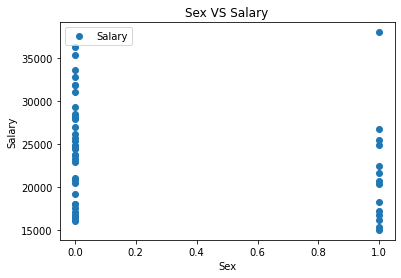

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [10]:
df.plot(x = 'Sex', y = 'Salary',style = 'o')
plt.title("Sex VS Salary")
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

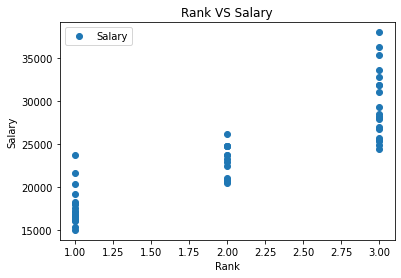

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [11]:
df.plot(x = 'Rank', y = 'Salary',style = 'o')
plt.title("Rank VS Salary")
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

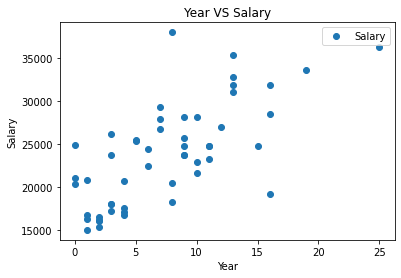

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [12]:
df.plot(x = 'Year', y = 'Salary',style = 'o')
plt.title("Year VS Salary")
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

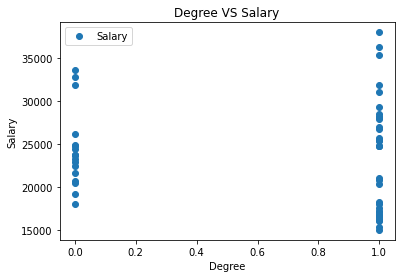

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [14]:
df.plot(x = 'Degree', y = 'Salary',style = 'o')
plt.title("Degree VS Salary")
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

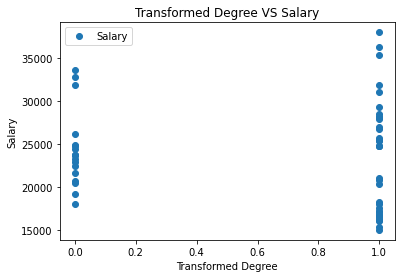

,Transformed Degree,Salary
Transformed Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [22]:
df['Transformed Degree'] = np.square(df['Degree'])
df.plot(x = 'Transformed Degree', y = 'Salary',style = 'o')
plt.title("Transformed Degree VS Salary")
plt.xlabel('Transformed Degree')
plt.ylabel('Salary')
plt.show()
df[['Transformed Degree','Salary']].corr()

Even after transforming the values the correlation does not change.so it is better keep the values as it is.because degree is also major factor for salary

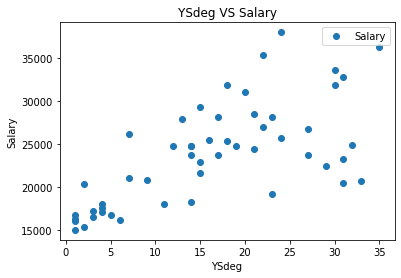

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [15]:
df.plot(x = 'YSdeg', y = 'Salary',style = 'o')
plt.title("YSdeg VS Salary")
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

In [25]:
X = df[["Sex", "Rank", "Year", "Degree", "YSdeg"]].values
y = df["Salary"].values 


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**SCALING**

---



In [27]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

**MODEL TRAINING**

---



In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
coeff_df = pd.DataFrame(regressor.coef_,["Sex", "Rank", "Year", "Degree", "YSdeg"], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,477.505951
Rank,4663.425905
Year,2426.269626
Degree,125.360914
YSdeg,-496.033054


In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,21438.071793
1,17095,16907.551585
2,24750,26420.307923
3,22450,22765.454548
4,28200,29412.358800
5,21600,19807.126936
6,18075,16467.430709
7,23713,18364.913236
8,24800,24896.746490
9,33696,32772.357197


**EVALUATION**

---



In [32]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.662315861487556
